In [1]:
import numpy as np
D = np.array([2, 10, 100], dtype=np.int)
limits = [-2.0, 2.0]
N_test = np.linspace(5, 25, 5, dtype=np.int)
C_test = np.linspace(0.1, 0.9, 5)
F_test = np.linspace(0.4, 1.3, 5)

In [30]:
def purpose_function(x):
    x_no_last = x[:-1]
    x_no_first = x[1:]
    return np.sum(100 * (x_no_last ** 2 - x_no_first) ** 2 + (1 - x_no_last) ** 2)


def purpose_function_population(population):
    N = population.shape[0]
    return np.min([purpose_function(population[i]) for i in range(N)])


def opt_plan(population):
    N = population.shape[0]
    opt_plan_index = np.argmax([purpose_function(population[i]) for i in range(N)])
    return population[opt_plan_index]


def get_population(D, N):
    result = np.random.uniform(low=limits[0], high=limits[1], size=(1,D))
    for i in range(N-1):
        item = np.random.uniform(low=limits[0], high=limits[1], size=(1,D))
        result = np.concatenate((result, item), axis=0)
    return result


def in_limits(x, limits):
    return np.all(np.logical_and(x <= limits[1], x >= limits[0]))


def get_test_item(population, F, limits):
    size = population.shape[0]
    D = population.shape[1]
    indexes = np.random.randint(low=0, high=size, size=3)
    while(len(set(indexes)) != 3):
        indexes = np.random.randint(low=0, high=size, size=3)
    sample = population[indexes]
    beta = sample[2]
    delta = sample[1] - sample[0]
    omega = beta + F * delta
    if not in_limits(omega, limits):
        omega = get_population(D, 1).reshape((D, ))
    return omega


def cross(x, omega, C):
    mask = np.random.uniform(size=x.shape[0]) >= C
    return omega * mask + x * (1 - mask)
    

def evolution_step(population, F, C, limits):
    size = population.shape[0]
    for i in range(size):
        omega = get_test_item(population, F, limits)
        omega = cross(x=population[i], omega=omega, C=C)
        if purpose_function(omega) < purpose_function(population[i]):
            population[i] = omega

    
def full_process(D, N, F, C, limits, kNoBetter, log_populations=False):
    population = get_population(D, N)
    cur_purpose_function_value = purpose_function_population(population)
    log = [cur_purpose_function_value, ]
    log_populations = [population.copy(), ]
    cur_no_better = 0
    while cur_no_better < kNoBetter:
        evolution_step(population, F, C, limits)
        next_purpose_function_value = purpose_function_population(population)
        if cur_purpose_function_value <= next_purpose_function_value:
            cur_no_better += 1
        else:
            cur_purpose_function_value = next_purpose_function_value
            cur_no_better = 0
        if log_populations:
            log_populations.append(population.copy())
        log.append(cur_purpose_function_value)
        if len(log) > 10000:
            break
    return population, log, log_populations

def mega_test(D_test, N_test, F_test, C_test, limits, kNoBetter, log_populations=False, verbose=True):
    log = []
    for D in D_test:
        for N in N_test:
            for F in F_test:
                for C in C_test:
                    pop, logs, _ = full_process(D, N * D, F, C, limits, kNoBetter, log_populations)
                    log.append([D, N * D, F, C, opt_plan(pop), logs[-1], len(logs)])
                    if verbose:
                        print(log[-1])
    return log

In [6]:
log = mega_test(D, N_test, F_test, C_test, limits, 50, verbose=True)

[2, 10, 0.4, 0.1, array([0.91320529, 0.83348131]), 0.0075547205436353616, 245]
[2, 10, 0.4, 0.30000000000000004, array([1., 1.]), 9.764079562813375e-20, 314]
[2, 10, 0.4, 0.5, array([1., 1.]), 0.0, 498]
[2, 10, 0.4, 0.7000000000000001, array([1.0005826 , 1.00120124]), 8.92944108682304e-09, 356]
[2, 10, 0.4, 0.9, array([-0.38498317, -0.10002955]), 0.022742651209669028, 73]
[2, 10, 0.625, 0.1, array([0.99588797, 0.99177221]), 1.6951372325230164e-05, 984]
[2, 10, 0.625, 0.30000000000000004, array([1., 1.]), 0.0, 345]
[2, 10, 0.625, 0.5, array([1.24776718, 1.55692293]), 0.061388573580402325, 8526]
[2, 10, 0.625, 0.7000000000000001, array([0.23157631, 0.04703847]), 0.006254521407091269, 81]
[2, 10, 0.625, 0.9, array([1.37265444, 1.57718124]), 0.2913996227490491, 79]
[2, 10, 0.8500000000000001, 0.1, array([1., 1.]), 0.0, 285]
[2, 10, 0.8500000000000001, 0.30000000000000004, array([1., 1.]), 0.0, 414]
[2, 10, 0.8500000000000001, 0.5, array([1., 1.]), 1.232595164407831e-32, 762]
[2, 10, 0.8500

[2, 50, 0.8500000000000001, 0.1, array([1., 1.]), 0.0, 289]
[2, 50, 0.8500000000000001, 0.30000000000000004, array([1., 1.]), 0.0, 438]
[2, 50, 0.8500000000000001, 0.5, array([0.99999959, 0.99999917]), 1.7542485253951398e-15, 337]
[2, 50, 0.8500000000000001, 0.7000000000000001, array([-1.38185056,  1.90343862]), 0.003962810232465607, 86]
[2, 50, 0.8500000000000001, 0.9, array([-0.01071761, -0.85838802]), 0.032524207219607575, 97]
[2, 50, 1.0750000000000002, 0.1, array([1., 1.]), 0.0, 352]
[2, 50, 1.0750000000000002, 0.30000000000000004, array([1., 1.]), 0.0, 541]
[2, 50, 1.0750000000000002, 0.5, array([1., 1.]), 0.0, 966]
[2, 50, 1.0750000000000002, 0.7000000000000001, array([ 0.05892072, -0.0475829 ]), 0.0013280253825149059, 125]
[2, 50, 1.0750000000000002, 0.9, array([ 0.25304348, -1.28627631]), 0.0843869673283688, 53]
[2, 50, 1.3, 0.1, array([1., 1.]), 0.0, 432]
[2, 50, 1.3, 0.30000000000000004, array([1.00002487, 1.0000503 ]), 3.178808819260786e-13, 241]
[2, 50, 1.3, 0.5, array([1.

[10, 100, 0.8500000000000001, 0.1, array([1.01066669, 0.99687049, 0.9731802 , 0.97641367, 0.93395786,
       0.90392958, 0.88736321, 0.77098237, 0.63384228, 0.38646816]), 0.32592374710401106, 751]
[10, 100, 0.8500000000000001, 0.30000000000000004, array([1.00196009, 1.0008369 , 0.99040891, 0.9822596 , 0.96692327,
       0.95209585, 0.90808299, 0.83054587, 0.71542123, 0.51035327]), 0.029956382660915493, 1335]
[10, 100, 0.8500000000000001, 0.5, array([0.92161503, 0.87360674, 0.77397768, 0.59902607, 0.36348147,
       0.12751458, 0.01465932, 0.00903167, 0.00467367, 0.0125121 ]), 2.8264247513364076, 1045]
[10, 100, 0.8500000000000001, 0.7000000000000001, array([0.38814244, 0.13623854, 0.13407849, 0.51400396, 0.72341932,
       0.92643509, 1.10204055, 1.23616237, 1.50413291, 1.89595691]), 5.837539804481543, 357]
[10, 100, 0.8500000000000001, 0.9, array([0.76894238, 0.56280329, 0.29740051, 0.10404157, 0.20772108,
       0.35684616, 0.56130821, 0.81629456, 1.37257539, 1.98345773]), 9.20656464

[10, 200, 0.4, 0.5, array([0.99919945, 0.99832292, 0.99662501, 0.99317508, 0.98665101,
       0.97323517, 0.94731368, 0.89716522, 0.80448022, 0.6465103 ]), 0.052354954460231994, 10001]
[10, 200, 0.4, 0.7000000000000001, array([0.83076194, 0.71777672, 0.73280486, 0.89720411, 0.92963668,
       1.01382747, 1.17098486, 1.18501341, 1.35640488, 1.68818879]), 5.344318676648666, 724]
[10, 200, 0.4, 0.9, array([0.55865884, 0.37185231, 0.18635373, 0.07882334, 0.12317513,
       0.58640629, 0.75435987, 1.02703562, 1.33540399, 1.82290578]), 2.5996509015306852, 503]
[10, 200, 0.625, 0.1, array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 0.0, 2300]
[10, 200, 0.625, 0.30000000000000004, array([1.00860758, 0.99876957, 1.00579289, 1.00528637, 1.00196713,
       1.00089946, 1.00024202, 0.99021888, 0.98779932, 0.97248441]), 0.0066829685343034835, 850]
[10, 200, 0.625, 0.5, array([1.00022987, 0.99942147, 0.99934763, 0.99497766, 0.98917368,
       0.97921018, 0.96383662, 0.93328161, 0.87082246, 0.75818967]

[10, 250, 1.3, 0.1, array([-0.33380907, -1.53987112,  1.19406882,  0.29964463, -0.09049247,
        1.63309391,  0.58650114, -0.27595217, -0.63256451,  0.22229101]), 98.85794303105078, 80]
[10, 250, 1.3, 0.30000000000000004, array([ 0.69849651, -0.41369703, -0.05145351, -0.51839815,  0.44278855,
       -0.52864407, -1.05286228,  0.4995555 , -0.06452387, -1.40915802]), 34.29148273742467, 168]
[10, 250, 1.3, 0.5, array([-0.31319219,  0.35506212,  0.89329305,  1.15143453,  1.37043608,
        1.51943774,  1.53879857,  1.47113133,  1.5140717 ,  0.81019227]), 30.05200460005637, 214]
[10, 250, 1.3, 0.7000000000000001, array([ 0.22369742, -0.07585281, -0.07898729, -0.32359817, -0.40659123,
        0.88986287,  1.14431067,  0.96656075,  0.42180692,  0.18682934]), 8.854760058234113, 351]
[10, 250, 1.3, 0.9, array([ 0.21586467, -0.20064253,  0.16937079, -0.71007014,  1.10955531,
        1.37118337,  1.31676632,  0.85784715,  0.77677393,  0.4306666 ]), 12.439343545902693, 260]
[100, 500, 0.4, 0.1

[100, 500, 0.625, 0.1, array([-1.54130745, -1.59228199, -0.68176405,  0.29278732, -1.20681249,
       -0.94910382,  1.6405057 ,  0.87318381,  1.32186128,  1.79722434,
       -0.16535391,  1.86962742, -0.43167599, -0.34772267, -0.2122586 ,
        1.86141948,  0.64644176, -1.28724737, -1.1805842 ,  0.19559526,
       -0.12708884,  1.44883198, -0.71410167,  1.21590696, -1.25358557,
       -1.2415877 ,  1.47964252, -0.40451232,  1.63038548, -0.73994626,
       -0.82609269, -0.29396186, -1.38363081,  1.53529251, -1.81632606,
        0.82940064,  1.67143134,  1.78889588, -1.00514082, -1.29071662,
       -0.2350709 ,  1.34095025,  1.94301578,  1.09733875, -0.47224564,
       -0.10381377, -0.87067449, -1.94135455,  0.30605563,  1.24913544,
        0.26961453,  0.37055462, -1.42054604,  1.26680539,  1.53238895,
       -0.38773579, -1.41472564, -1.23896187,  0.73131055,  1.1387942 ,
        1.04338676,  1.28543234, -0.78790751,  1.35236189,  1.35905114,
       -1.46296999,  1.03958995,  1.19187

[100, 500, 0.8500000000000001, 0.30000000000000004, array([ 0.46920728, -0.33905738,  1.91396837,  0.27203031, -1.38222317,
        0.08945539, -1.53137206,  0.85186918, -0.02332369, -0.6956022 ,
        0.94938417,  0.83884756,  0.92332892, -0.5107885 ,  0.53057225,
        1.05116913,  0.66678866,  0.63918496, -1.0712669 , -0.19687965,
       -1.45074675,  1.555487  ,  1.01372027,  0.33833189,  0.04514236,
        0.16513236,  0.05251776, -1.35045988,  0.2384953 ,  0.65649556,
       -0.15235835,  1.80909163,  0.97725748, -0.68220811,  1.10050867,
        1.24274886,  1.42354447, -1.59845   , -1.45842752, -1.39160932,
       -0.45832844, -1.80737215,  1.8279153 ,  1.05311668,  1.14344718,
        1.00623412,  0.92795576,  1.24307256, -1.59844592,  1.04147467,
       -0.71208358,  0.86051879,  1.79201258, -0.42118855, -1.2866455 ,
       -1.12231922,  1.93862321, -1.5688971 , -1.41309507,  1.85349651,
        1.90366907,  0.95007168, -0.51738617,  1.29550409,  1.70325463,
        1.74

[100, 500, 1.0750000000000002, 0.30000000000000004, array([ 9.43212506e-01, -9.67544205e-01, -1.22483062e+00,  6.79608644e-01,
       -2.91254331e-01, -1.83750265e+00,  1.39126823e+00, -1.84969935e-01,
        1.39359061e+00,  6.15023174e-01,  5.99932523e-01,  6.14984822e-01,
       -1.75853921e+00,  4.67755064e-01,  1.79080257e-03, -1.18964877e+00,
       -1.29792191e-01,  1.45142632e-01, -1.32172780e+00, -1.46382937e+00,
       -1.40938742e+00, -1.81750311e+00,  1.97481168e+00,  5.74153939e-01,
        1.74297952e+00, -1.49376652e+00,  6.61425248e-01,  2.21783600e-01,
        1.36075761e+00,  5.03963867e-01, -8.14629791e-01,  1.35147764e+00,
       -1.45453698e+00,  1.89670507e+00,  1.53074354e+00,  1.26246668e+00,
       -1.44182289e+00,  1.00602661e+00,  2.54917955e-01,  2.04866682e-01,
       -4.66089984e-01,  3.42521954e-01,  1.08742317e+00,  8.48650421e-01,
        9.58139026e-01,  7.07245900e-01,  3.54894284e-01, -1.80123360e+00,
        1.12529383e+00, -1.88202610e-02,  5.5315

[100, 500, 1.3, 0.5, array([-1.43188954,  1.06564112,  0.60331161, -0.43072882,  1.97010755,
       -0.21575446,  0.82977652, -0.09263947, -1.43506801, -1.03210411,
        1.99550297,  1.51690084,  0.20545221, -1.1328907 ,  1.78198997,
       -1.94464703,  1.10330468, -0.15693126,  0.59490957, -0.76011915,
       -0.58178789,  0.0402956 , -1.52367278,  0.44473923, -0.79560267,
        0.0447833 , -1.90741577,  1.36395058,  1.08264586, -0.85734667,
       -1.58976392,  0.67570863, -0.04182742,  1.17335885, -0.49022216,
        1.09278966,  0.87669595,  1.83569656, -0.0762391 , -0.19303835,
       -1.91577428, -0.06431932,  0.41894587,  0.54039345,  1.97428392,
        1.12846559, -1.38464911,  1.05982396, -0.84593924, -1.27138783,
        1.05197314,  0.32619929,  0.03289052, -0.32886175, -0.71379765,
        0.62248729,  0.78680602,  1.91286172,  0.72682994,  0.19711215,
        0.75696733, -0.71328998, -1.55158504, -0.59306206, -1.45087958,
        1.7488594 ,  1.30736692,  0.7692408

[100, 1000, 0.4, 0.7000000000000001, array([ 1.31249221e+00,  6.58934966e-02, -1.58738548e-01,  1.08414528e+00,
        1.28791601e+00,  1.59348150e+00, -1.63612337e+00,  1.43041847e+00,
       -2.36735543e-01, -1.01845179e+00,  1.59064576e+00,  4.12623579e-01,
       -6.57469824e-01, -1.17818540e+00, -6.60330231e-01, -1.69110488e+00,
        1.87330852e+00,  1.50813857e+00,  1.02174199e+00,  5.80324120e-01,
        6.97500876e-01, -1.20267223e+00,  1.53553440e+00,  9.47955153e-01,
       -2.38385064e-01, -5.79845301e-02, -1.17456796e+00,  3.81153969e-01,
        1.65723327e-01,  1.15780552e+00, -1.01457725e+00,  1.60401068e+00,
        1.20597560e+00,  1.99685291e+00,  1.38830034e+00, -8.92094574e-02,
        6.95213484e-02,  1.36793142e+00, -3.05213836e-01, -1.58753249e+00,
        8.53572175e-01, -3.01860828e-01,  1.64135360e-02, -1.27542995e-01,
        1.56557962e+00, -4.06209972e-01, -1.64496400e+00, -1.59051014e+00,
        2.06732171e-05, -1.32101458e+00,  2.56624340e-01,  3.45

[100, 1000, 0.625, 0.9, array([-1.16766724, -0.83626059, -0.79473291, -1.1998603 , -1.37969485,
        0.74585446,  1.49199274, -1.0562812 , -1.58291386,  1.60781978,
        1.07410746,  0.17447229, -1.2284633 ,  1.13032041,  0.82354492,
        0.16197154,  0.9870986 , -0.33460267,  0.90106909,  0.69307233,
        0.03287999, -0.54921048, -0.522904  , -0.00510163,  0.28090052,
        0.50271812, -0.14581083, -0.1163064 , -1.20040164,  0.08899222,
        0.47206605, -0.5435984 , -1.18330749,  1.3458801 , -0.8545006 ,
       -0.67887417,  1.76767958, -0.31202262,  0.01709485,  0.0862995 ,
        0.09828865, -0.11244709, -0.38817272, -0.60658695,  0.0706775 ,
        0.34419812,  0.16952625,  0.13620386,  0.42215058,  0.28432504,
       -0.25793838, -1.56990732,  0.30104763, -1.33519781,  1.43155063,
        1.47132316, -0.39709798, -1.29329779, -0.19160525, -0.01292323,
        0.85742541,  1.50116013,  1.50486915, -0.69967204,  1.25415853,
       -0.57341408, -1.26680214, -1.5578

[100, 1000, 0.8500000000000001, 0.9, array([ 0.60279239, -0.47221822, -0.37195825, -1.01222885,  0.20949011,
        0.75060512,  0.9833768 , -0.63455676,  0.56879096,  0.25763286,
       -0.24199224, -0.76210283,  1.20363522,  1.6486455 , -0.46694144,
        0.01624111, -0.58506336,  1.37147017,  1.54067765,  1.18909714,
        0.46764979,  0.49078266,  0.37032493,  0.47228438,  1.6989887 ,
        0.84284687, -1.22868177,  1.82241067,  1.55524475, -0.38362695,
        0.07848458, -1.10044697, -1.4054708 ,  1.85323903, -0.45907902,
        0.1474995 , -1.35512808,  1.12520766, -0.50237903, -1.23252253,
       -0.12954385,  0.49219603, -1.70141924,  0.94709356,  1.42800207,
        0.92503817, -0.07737581,  0.82302229,  0.89593572, -0.66607423,
        1.35572359,  0.5520491 , -0.11413027, -0.37371202, -0.7563757 ,
        0.38217918, -0.847608  , -1.49914817,  0.42827839,  0.5251536 ,
       -0.30486123,  0.17445565, -0.78424785,  0.84930422,  0.95518686,
        0.51967261,  0.8164

[100, 1000, 1.3, 0.1, array([-0.28699337, -0.82279414, -0.60581884, -1.18559182, -0.18822871,
        1.76664752,  1.86739356, -1.08937216, -0.53091639, -0.95402653,
        1.2183985 ,  1.00014053,  0.92546324,  0.92448831,  0.21323926,
        0.19976565, -0.40844838, -1.10855431,  1.29380839, -0.51301723,
        1.2891215 , -0.98005302, -0.14051142, -0.32106691, -1.02646418,
       -0.8706571 ,  0.27000475,  0.8703604 , -0.13394201,  0.41691931,
       -1.54058954,  0.78142638, -1.49930035, -0.42511666, -1.75776563,
        0.98815192,  1.36573204, -0.38167746, -0.35312647, -1.36799274,
        1.34858289, -1.86728825, -0.70498638,  1.17144356, -1.64165885,
       -1.1158896 ,  1.77472783,  0.78630465,  0.73639747, -1.12715123,
        1.02591429, -0.10747512, -0.19384009, -0.21596656,  1.83265512,
        1.73789792,  0.41046518,  0.30689668,  0.41042135, -0.7086499 ,
        1.79037136,  1.13683909, -0.98801052,  0.88278618,  1.2654915 ,
        1.9193869 ,  0.04596228, -0.804452

[100, 1500, 0.4, 0.30000000000000004, array([ 1.28963953, -0.8617732 ,  1.29265291,  0.41118392, -1.03800886,
        0.43572613, -0.99755569, -0.34514901,  0.42911899,  0.47614018,
       -0.89954182, -1.67858434,  1.09122904,  0.97770023,  0.75304718,
       -1.38651545, -0.7582586 , -1.30846871,  0.4470176 ,  1.20479487,
        1.32331679,  0.78139541,  1.22232917, -0.65283228, -1.08669549,
       -1.83957258, -0.62148422,  1.00284537, -1.33888151,  1.22713145,
        0.93846372, -1.55375136,  1.45996133,  0.87614976,  0.37781704,
        1.05583548, -0.41001742, -1.25286698,  1.96160777,  1.4224056 ,
       -1.80906919, -0.37014807, -0.62589458, -1.5111051 , -0.41713155,
        0.16844037,  0.98757881, -0.48578085,  1.77184939,  0.57791836,
       -1.98220146,  0.86106855,  1.87127991,  1.16227302, -1.68152993,
        1.19486197,  0.86185085, -0.63827798,  0.2564851 , -0.10907993,
       -0.22781923, -0.78548693, -0.2292752 , -1.34025027,  1.5816438 ,
        1.51457781,  0.855

[100, 1500, 0.625, 0.5, array([ 1.03775599, -1.86697259,  0.00821032, -0.36302721, -1.63276824,
        1.73841605,  1.75356542, -0.04094093, -1.57488496,  1.61807114,
       -0.65810069,  0.82060261, -0.1805365 ,  0.17411036,  1.47121762,
       -0.93875904, -0.09320092,  0.88033823, -1.00581685,  1.62346423,
       -0.08571393,  0.36184024,  0.55235797,  0.8903104 ,  1.86523137,
        1.69399394,  1.80717276,  1.41054981,  1.51550941,  0.3767794 ,
       -1.30329484, -0.30673969, -0.36593214,  1.87916448, -1.88237452,
        0.90122444,  1.71380419, -0.76316191, -0.71271648,  0.98372165,
        0.70915128, -0.52782972, -1.02611386, -1.31968215, -0.2473294 ,
       -0.11809834,  1.05922589,  0.85257663,  0.15024123,  1.1400108 ,
       -0.37032119,  0.48257129,  0.03813326, -1.68728312, -0.97603487,
        1.42093327,  1.47499184,  1.10747162,  0.66580347,  0.99340726,
        0.96577141, -0.16976098, -0.71901192,  0.53781552, -1.00348   ,
       -0.16671712, -1.45635645, -0.1239

[100, 1500, 0.8500000000000001, 0.7000000000000001, array([-0.07785062, -0.02037649, -1.8094102 ,  1.86445259,  0.76570904,
        1.80929369,  1.74642163,  1.93121689,  1.56554434, -1.28196207,
       -1.68332889,  0.78745054,  1.7469012 ,  1.09419198,  1.98421241,
        1.02430854,  0.43014953, -0.28752516, -1.46660179,  0.73478385,
       -0.495973  ,  0.35420433, -0.59617388, -1.38047967, -0.91455833,
       -0.74084079, -0.69025514,  0.72020891, -0.78556639, -0.78030823,
       -0.84652283,  0.7828482 , -0.03826576, -0.958739  ,  1.81955912,
        1.80154746,  1.12595906, -0.22302744, -0.70960462, -1.16564692,
       -0.50518088,  0.1125606 ,  0.56164128,  0.57381637, -1.27777329,
        0.98506399, -0.92159171,  1.66847231,  0.04848798, -0.98282364,
        0.95765559, -0.06039417, -0.57580037,  1.25349605, -0.7927737 ,
        0.57199183, -1.69033454,  0.42354318, -0.83917629, -0.9277523 ,
        0.90562868, -0.51552893, -1.11295138, -1.39841358, -0.90265041,
        1.37

[100, 1500, 1.0750000000000002, 0.9, array([-0.52970243, -0.16635332,  0.84916986,  1.66505086, -0.44328164,
       -0.40393481,  0.48932076, -0.58596732,  1.16588973,  1.66032921,
        1.17948271,  0.34673932, -0.35937891, -1.21706458,  0.18803793,
        1.17892942,  1.27614848, -0.66721306, -1.67329907,  1.29785131,
       -0.49821504, -0.27509609, -0.2244729 , -0.39529698, -0.67330243,
        0.21447465, -0.12662135, -1.53325735,  1.71166464,  1.33962754,
       -0.64016315,  0.08389064,  1.41357638,  1.86374326, -0.06210422,
        0.74384246, -1.42162782,  0.73878493,  0.05566032, -0.78489541,
        1.50347345, -0.42470432,  0.77932468,  1.09895489,  0.28766237,
       -1.51045423,  1.72975135,  1.77058546,  0.71896105,  1.08777114,
       -0.64076066,  0.12064341,  0.47731752,  0.94349396,  0.12893372,
       -0.58672067, -1.11449016, -0.78858349,  1.63073561,  1.21999266,
        0.49603572, -0.19692759,  0.26330822,  1.87231876,  1.92226723,
        1.43621715,  1.5993

[100, 2000, 0.4, 0.1, array([-0.0705842 , -1.42511459,  0.12097708, -1.32541939, -0.41475788,
        0.84405556, -1.29541628,  0.40693387, -0.40933419,  1.04490953,
       -0.44432666,  1.64259953, -1.86713968,  1.25560008,  0.08776784,
        1.47671857,  1.43115308,  0.90960176,  1.08744067, -1.79787716,
       -1.53588355,  1.61508841,  1.96609069,  0.27043148, -0.9330602 ,
        0.60930183, -0.68810339, -1.50705372,  1.56220893, -1.83955934,
        0.12479061, -1.85589207,  1.9389372 , -1.99368648,  0.74526781,
        0.01507275, -1.07572645, -0.4076222 , -0.78285818, -0.85692735,
        0.05759191, -0.35604792,  0.95181872, -1.91136413,  1.13649346,
        1.99823046, -0.92399378,  0.1848163 ,  0.15766648,  1.70294546,
        1.76170701, -0.97768212,  1.33232373,  0.52773724, -1.26665246,
       -0.63488169, -1.32262225, -0.55714579,  1.08771056, -0.34786495,
       -0.98969134, -1.01573854,  0.05929623,  0.01074038, -0.88079783,
        0.38067497,  0.25448379,  0.950351

[100, 2000, 0.625, 0.30000000000000004, array([-1.52149958e-01, -1.69407416e+00,  1.56056977e-02, -1.15147657e+00,
       -8.35945704e-01,  1.77560678e+00, -1.70185145e+00,  1.05960765e+00,
        7.52851064e-01,  5.22133974e-01, -1.05971274e-01, -9.12930988e-01,
        1.14059642e+00, -6.89931114e-01, -1.53732867e+00,  1.64647725e+00,
       -1.61981093e+00, -1.74871569e+00,  1.94755810e+00, -6.92151374e-01,
       -1.19071350e+00,  1.17155334e+00,  1.65490486e+00,  2.56266541e-01,
       -1.79620958e+00,  5.88555420e-01, -6.18933216e-01,  1.95747264e+00,
       -1.57991079e+00, -2.01983350e-01, -1.18225179e+00,  6.21652905e-01,
       -4.84222414e-01, -1.23028335e+00,  1.71981504e+00, -1.17937852e+00,
       -2.58832915e-01, -1.15392338e-01, -3.32435589e-02, -8.42988274e-01,
        1.56941441e+00, -1.53787761e+00, -1.28687161e-01, -8.41568357e-01,
        8.64902224e-01,  2.61672670e-01,  1.67639584e-01, -6.45651891e-01,
       -9.92939957e-01,  1.05950576e+00,  8.36390820e-01,  1

[100, 2000, 0.8500000000000001, 0.30000000000000004, array([ 0.46681998,  0.03303228,  0.56830723, -1.32837291, -1.10761107,
       -0.95070314, -0.97958951, -0.18922971,  0.50203517,  1.09810622,
        0.45151299, -1.42403522,  0.99244664, -1.20339575,  1.88934887,
       -0.70528747, -1.20632015, -0.88956163, -0.69299909, -0.77741128,
       -0.35487273,  0.35219429,  1.71482418,  1.2224837 ,  1.13442879,
       -1.04638385, -0.35043892,  1.39347745,  1.91217787,  0.14439656,
        0.78875322, -1.49583223,  1.26340812, -1.08263161,  1.69504038,
        1.66599911,  1.82994996,  1.13208819,  0.03100382, -0.74623738,
        1.19518052,  1.20203377,  1.25094805,  1.10312189,  1.82539011,
       -0.27384059,  1.61804215, -1.12770348,  0.17554815, -0.43078598,
        0.23158369,  0.7915524 , -1.42889505,  0.41900219,  0.67481529,
       -0.77935058,  1.51962414,  0.79388197,  0.70714413,  1.98400211,
        1.57992694, -1.83913138,  1.48661236, -0.61129943, -0.46957673,
        0.8

[100, 2000, 1.0750000000000002, 0.5, array([ 0.1755211 , -0.44358998,  1.35539852,  0.85577858,  1.34061995,
       -1.07963   , -1.55589686,  1.45106852, -0.64034097, -0.7583984 ,
       -1.39433667, -1.6089183 ,  1.60395886,  1.19191707, -0.76234927,
       -0.8197738 ,  1.40258802, -1.73392606,  0.25760704, -0.62592739,
        1.78613905, -0.87366715, -1.75209658, -0.26604694, -0.06077235,
        0.81377681, -1.3812647 , -0.12837412, -0.15954252,  0.3673997 ,
       -1.45309125, -0.1950896 , -1.41248386,  0.03173435,  1.59666332,
        1.16500654, -1.37784443,  0.90555024, -1.24082652,  0.1159889 ,
        0.50533134,  1.51895343,  0.04514506, -0.68101175, -1.39841125,
       -0.54015618,  0.71395953, -0.74217533,  0.02781269, -0.81706268,
       -0.5652742 ,  1.48676596,  0.20286329,  1.53433888,  1.28841303,
        1.71039184, -1.22194291,  1.63582389, -0.49701486,  0.01085012,
       -0.68180013,  0.79415508,  0.49418895, -0.98197615,  0.25167611,
        0.56199889,  0.9316

[100, 2000, 1.3, 0.7000000000000001, array([-1.52390846, -1.5125473 ,  0.36939799,  1.85173666,  0.07484514,
        1.6007009 ,  1.12838189,  1.28118729, -0.27967661,  1.15087089,
        1.9248007 , -0.68292003, -0.53857693,  0.07155098, -1.46013026,
        0.76749124,  0.52485468, -0.54379449, -0.88068268, -1.27847136,
        1.861807  ,  1.90687009, -0.34091531, -1.47630097,  1.95700073,
       -1.3292807 ,  1.78020444, -0.46615251,  1.10158781,  1.41520602,
        1.84689537, -1.23710526,  1.77024239,  1.67621947, -0.30706335,
        0.24201857, -1.49254661, -0.26804977, -1.9018272 ,  1.22061449,
        1.55368743, -0.97890906,  1.02568207,  0.07871514, -1.29223309,
       -1.68645596,  0.01022557,  0.95155176, -0.06624512, -0.61332547,
        0.03481765,  0.26618954,  1.0109364 ,  0.60275947,  0.09591304,
       -0.80821398,  0.4658728 ,  1.49032748,  1.43944383,  0.76460546,
       -0.91921237,  0.44516947,  0.19884473, -0.22414312,  0.7342358 ,
        0.09389167, -1.0202

[100, 2500, 0.4, 0.9, array([ 0.11737558,  0.93484482, -1.44228821,  0.40669567, -1.28777142,
        1.89033785,  0.95081557,  1.67420751,  0.0104889 , -0.79993705,
        1.05648349, -0.57585773,  0.78624548,  1.35249115,  0.57890204,
        1.00948124,  0.69325433,  0.97213544,  0.13271196, -0.89916019,
       -1.63865049,  1.92314669,  0.3236868 , -0.70392783, -0.60997718,
        0.99286077, -1.004952  , -0.88001202, -0.19293836,  1.40347547,
        0.5244986 , -0.69181807, -0.31912111,  0.7946462 ,  0.88669966,
       -0.54237756, -0.14602597, -0.15007827,  0.69859192, -0.87832827,
        0.52458002, -1.00871836,  0.01063733, -0.51578125,  0.8725336 ,
       -0.85854626, -1.69546138,  1.21833224,  1.09964306,  0.64286395,
       -1.03174968,  1.43426719,  1.74387694,  1.12092823,  0.33556318,
       -1.61327698,  1.44057197,  0.62250989, -1.58502838,  0.71750692,
       -1.71588409,  0.93073132,  1.12198853, -1.05666489,  0.15561603,
       -0.11907266, -1.45956635,  0.639739

[100, 2500, 0.8500000000000001, 0.1, array([ 1.18784033, -0.73359212, -0.46938711,  1.64362765, -0.84720896,
        1.50882746,  0.43711139, -0.40736752,  0.88298507,  0.34616749,
        0.26769443, -0.77241772,  0.79429193,  0.98444664,  1.8762156 ,
        0.53044111,  0.64619941,  1.11293425,  1.21673078,  1.46731224,
       -1.20172903,  0.22413016,  0.0041818 ,  0.94699949,  0.44497791,
       -0.1120235 ,  0.00981471,  0.70139394, -1.63859163,  0.65662953,
        1.64143969, -1.09779796, -0.68870881, -0.79837376,  1.10960869,
        0.32354764,  0.64639549, -0.36450183, -0.47547312,  1.09888132,
       -0.10775445, -0.29246382, -1.47859531,  0.56019641,  0.51267657,
        0.1552388 , -0.73365677,  0.09326406, -1.7072876 ,  0.03937198,
        1.55604659,  0.34735955, -1.42039028, -0.49588129,  1.21197026,
        0.8181726 , -0.62887622,  1.82060796, -0.88483663, -0.96352967,
        0.82835575, -0.63571399, -1.73034227,  0.10829399,  1.40102837,
       -1.86088559,  0.2795

[100, 2500, 1.0750000000000002, 0.30000000000000004, array([ 0.70875149,  1.75857897, -0.86397021, -1.10847624, -0.1658572 ,
       -1.63787743, -0.01277125,  0.40625976,  0.64432912, -0.98608067,
       -0.96925285, -0.47860512,  0.39618167, -0.78561406,  1.61356295,
       -0.99522006, -1.42810236,  1.61381952, -1.10400643, -1.70714514,
       -1.36013632,  1.64340455,  0.33678367,  0.53468351,  0.90470325,
       -1.27610575,  1.45183325, -0.43005104, -0.41830728,  0.51617888,
        0.70250617, -0.35910015, -0.7771058 ,  0.54626379, -0.13234952,
       -1.10376118, -0.74478369, -0.7298547 , -0.76663683,  1.04714799,
        0.37207879, -0.22925985, -0.7268502 ,  1.15524505, -1.59887717,
        0.95975288,  1.24799557,  0.88990821, -0.58946638, -0.83736629,
        1.9189442 ,  0.82553932,  0.38520576,  1.96275616,  0.15444959,
        0.88926588,  1.73257184, -1.16964407,  1.74634638,  1.21053304,
       -0.0505566 , -0.1239953 , -0.83817804,  0.53070843,  1.68591881,
       -0.4

[100, 2500, 1.3, 0.5, array([-1.67694184,  1.9869032 ,  0.82483497,  0.66592302,  1.60530575,
        1.24671103,  0.9439177 ,  1.69118892,  1.74523025, -1.71706091,
        0.40278486,  1.72233898, -1.57648831,  1.58319044,  1.83721423,
       -1.46148695,  1.23781783, -0.55978114, -0.90005587,  0.60751982,
       -0.50877946, -0.66653387, -0.94243794,  0.27250492, -0.59639905,
       -1.14109755, -1.77089949,  1.71258706,  0.80358331,  1.06817697,
        0.20462705, -0.55095208, -1.13236043, -0.29029739, -0.86353307,
       -1.02717311, -0.25181718, -1.21846189,  0.71588578,  1.39880166,
       -1.52537247,  0.77852518, -0.3830017 ,  1.75376714,  1.44278038,
        0.51136168,  0.14990131,  1.01218903, -1.71939763,  0.44241875,
        1.80674417, -0.96584289, -1.18732292,  1.67540393,  1.07816754,
       -0.78279104, -1.22888201, -1.18743986, -0.16156376, -0.41310141,
        1.01703965, -1.95509192,  0.95647232, -0.00842259, -1.3734272 ,
        1.1430398 ,  1.04913499, -0.844779

In [7]:
def get_best_params(log):
    opt_value = np.min([log[i][5] for i in range(len(log))])
    opt_indexes = [i for i in range(len(log)) if log[i][5] == opt_value]
    min_iter_count = np.min([log[i][6] * log[i][1] for i in opt_indexes])
    index = [i for i in opt_indexes if log[i][6] * log[i][1] == min_iter_count][0]
    return log[index][:4]

In [8]:
log2 = log[:125]
log10 = log[125:250]
log100 = log[250:]

In [9]:
best_params = [get_best_params(log2), get_best_params(log10), get_best_params(log100)]

In [10]:
best_params

[[2, 10, 0.8500000000000001, 0.1], [10, 50, 0.625, 0.1], [100, 2000, 0.4, 0.9]]

In [11]:
for i in range(len(log2)):
    print(log2[i][:4] + log2[i][5:])

[2, 10, 0.4, 0.1, 0.0075547205436353616, 245]
[2, 10, 0.4, 0.30000000000000004, 9.764079562813375e-20, 314]
[2, 10, 0.4, 0.5, 0.0, 498]
[2, 10, 0.4, 0.7000000000000001, 8.92944108682304e-09, 356]
[2, 10, 0.4, 0.9, 0.022742651209669028, 73]
[2, 10, 0.625, 0.1, 1.6951372325230164e-05, 984]
[2, 10, 0.625, 0.30000000000000004, 0.0, 345]
[2, 10, 0.625, 0.5, 0.061388573580402325, 8526]
[2, 10, 0.625, 0.7000000000000001, 0.006254521407091269, 81]
[2, 10, 0.625, 0.9, 0.2913996227490491, 79]
[2, 10, 0.8500000000000001, 0.1, 0.0, 285]
[2, 10, 0.8500000000000001, 0.30000000000000004, 0.0, 414]
[2, 10, 0.8500000000000001, 0.5, 1.232595164407831e-32, 762]
[2, 10, 0.8500000000000001, 0.7000000000000001, 0.029171099991794285, 98]
[2, 10, 0.8500000000000001, 0.9, 0.44314202555570986, 171]
[2, 10, 1.0750000000000002, 0.1, 0.0, 393]
[2, 10, 1.0750000000000002, 0.30000000000000004, 0.0, 581]
[2, 10, 1.0750000000000002, 0.5, 6.224605580259546e-28, 972]
[2, 10, 1.0750000000000002, 0.7000000000000001, 0.167

In [12]:
for i in range(len(log10)):
    print(log10[i][:4] + log10[i][5:])

[10, 50, 0.4, 0.1, 7.125524745831758, 10001]
[10, 50, 0.4, 0.30000000000000004, 6.939210927523591, 10001]
[10, 50, 0.4, 0.5, 4.575533031588241, 10001]
[10, 50, 0.4, 0.7000000000000001, 4.156846480731334, 10001]
[10, 50, 0.4, 0.9, 4.264742018459562, 514]
[10, 50, 0.625, 0.1, 0.0, 2033]
[10, 50, 0.625, 0.30000000000000004, 0.00014226302143774186, 1117]
[10, 50, 0.625, 0.5, 0.6300307184828351, 1367]
[10, 50, 0.625, 0.7000000000000001, 5.704446910993907, 323]
[10, 50, 0.625, 0.9, 4.759500283354953, 440]
[10, 50, 0.8500000000000001, 0.1, 0.00418002707113865, 1017]
[10, 50, 0.8500000000000001, 0.30000000000000004, 33.096328368621954, 124]
[10, 50, 0.8500000000000001, 0.5, 4.796945040162304, 511]
[10, 50, 0.8500000000000001, 0.7000000000000001, 4.859142232913869, 478]
[10, 50, 0.8500000000000001, 0.9, 4.141552550332722, 453]
[10, 50, 1.0750000000000002, 0.1, 157.95541709028913, 92]
[10, 50, 1.0750000000000002, 0.30000000000000004, 51.824955342996816, 254]
[10, 50, 1.0750000000000002, 0.5, 6.4

In [13]:
for i in range(len(log100)):
    print(log100[i][:4] + log100[i][5:])

[100, 500, 0.4, 0.1, 19262.241074164896, 111]
[100, 500, 0.4, 0.30000000000000004, 19145.152087826176, 133]
[100, 500, 0.4, 0.5, 16159.768933227058, 107]
[100, 500, 0.4, 0.7000000000000001, 12399.127887301105, 177]
[100, 500, 0.4, 0.9, 4357.814441982644, 491]
[100, 500, 0.625, 0.1, 21785.05569723643, 63]
[100, 500, 0.625, 0.30000000000000004, 20744.85375211873, 60]
[100, 500, 0.625, 0.5, 17903.201686337445, 169]
[100, 500, 0.625, 0.7000000000000001, 15134.97544546678, 120]
[100, 500, 0.625, 0.9, 6653.171507681255, 357]
[100, 500, 0.8500000000000001, 0.1, 22657.502279542507, 127]
[100, 500, 0.8500000000000001, 0.30000000000000004, 19402.27882680908, 115]
[100, 500, 0.8500000000000001, 0.5, 14579.368940196811, 166]
[100, 500, 0.8500000000000001, 0.7000000000000001, 14839.61066567215, 173]
[100, 500, 0.8500000000000001, 0.9, 8214.426230514791, 193]
[100, 500, 1.0750000000000002, 0.1, 21826.34136030758, 155]
[100, 500, 1.0750000000000002, 0.30000000000000004, 17490.85839420266, 138]
[100, 

In [31]:
import time
kTimes = 10
start = time.time()
for i in range(kTimes):
    bp_proc2, bp_log2, _ = full_process(best_params[0][0], best_params[0][1], best_params[0][2], 
                                               best_params[0][3], limits, 50)
print('D=2 mean work time: {} seconds.'.format((time.time() - start) / kTimes))

D=2 mean work time: 0.19593801498413085 seconds.


In [32]:
start = time.time()
kTimes = 5
for i in range(kTimes):
    bp_proc10, bp_log10, _ = full_process(best_params[1][0], best_params[1][1], best_params[1][2], 
                               best_params[1][3], limits, 100)
print('D=10 mean work time: {} seconds.'.format((time.time() - start) / kTimes))

D=10 mean work time: 6.585433387756348 seconds.


In [33]:
kTimes = 3
start = time.time()
for i in range(kTimes):
    bp_proc100, bp_log100, _ = full_process(best_params[2][0], best_params[2][1], best_params[2][2], 
                                                     best_params[2][3], limits, 300)
print('D=100 mean work time: {} seconds.'.format((time.time() - start) / kTimes))

D=100 mean work time: 875.7185890674591 seconds.


In [34]:
bp_log2[-1], bp_log10[-1], bp_log100[-1]

(0.0, 0.0, 93.82838291139522)

In [42]:
print(opt_plan(bp_proc2))

[1. 1.]


In [43]:
print(opt_plan(bp_proc10))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [44]:
print(opt_plan(bp_proc100))

[6.52412292e-01 4.32555678e-01 1.95869173e-01 4.68087712e-02
 1.18971410e-02 1.02722695e-02 1.02102353e-02 1.02084331e-02
 1.02084364e-02 1.02084230e-02 1.02084199e-02 1.02084229e-02
 1.02084232e-02 1.02084292e-02 1.02084205e-02 1.02084182e-02
 1.02084412e-02 1.02084235e-02 1.02084199e-02 1.02084280e-02
 1.02084209e-02 1.02084242e-02 1.02084348e-02 1.02084183e-02
 1.02084179e-02 1.02084155e-02 1.02084244e-02 1.02084300e-02
 1.02084286e-02 1.02084280e-02 1.02084213e-02 1.02084301e-02
 1.02084288e-02 1.02084304e-02 1.02084207e-02 1.02084266e-02
 1.02084222e-02 1.02084239e-02 1.02084291e-02 1.02084258e-02
 1.02084282e-02 1.02084234e-02 1.02084327e-02 1.02084303e-02
 1.02084212e-02 1.02084232e-02 1.02084331e-02 1.02084175e-02
 1.02084201e-02 1.02084268e-02 1.02084173e-02 1.02084269e-02
 1.02084156e-02 1.02084260e-02 1.02084320e-02 1.02084235e-02
 1.02084231e-02 1.02084260e-02 1.02084202e-02 1.02084179e-02
 1.02084147e-02 1.02084222e-02 1.02084250e-02 1.02084297e-02
 1.02084259e-02 1.020841

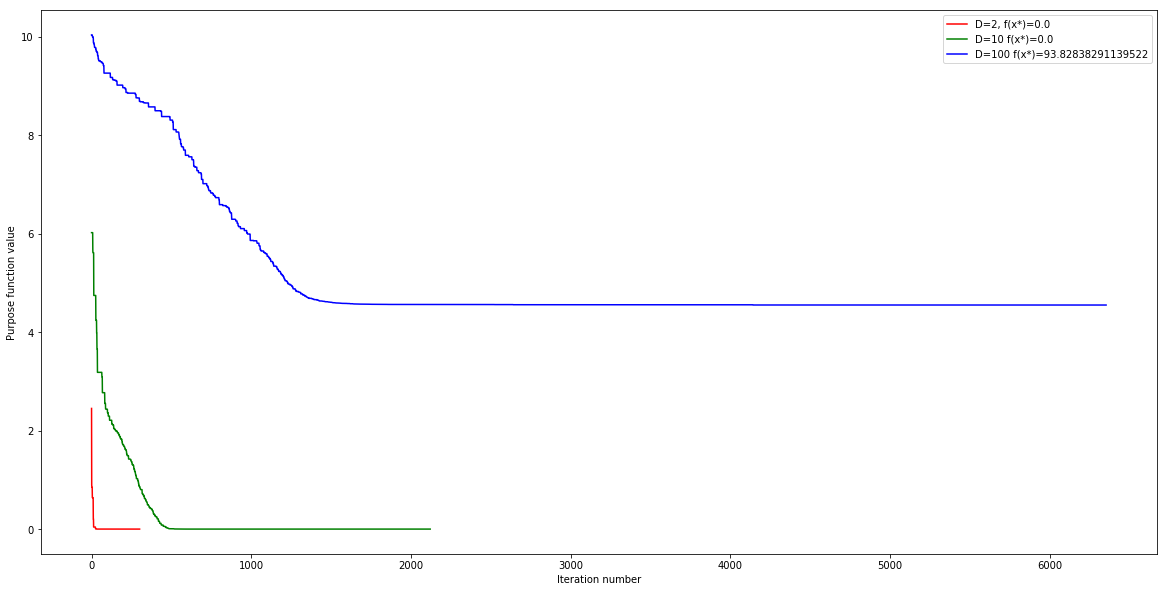

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,10))
plt.plot(np.arange(len(bp_log2)), np.log(np.array(bp_log2) + 1), color='red')
plt.plot(np.arange(len(bp_log10)), np.log(np.array(bp_log10) + 1), color='green')
plt.plot(np.arange(len(bp_log100)), np.log(np.array(bp_log100) + 1), color='blue')
plt.title('')
plt.ylabel('Purpose function value')
plt.xlabel('Iteration number')
plt.legend([
    'D=2, f(x*)={}'.format(bp_log2[-1]), 
    'D=10 f(x*)={}'.format(bp_log10[-1]),
    'D=100 f(x*)={}'.format(bp_log100[-1]),])

In [38]:
plan2, logs2, plans2 = full_process(best_params[0][0], best_params[0][1], best_params[0][2], 
                               best_params[0][3], limits, 50, log_populations=True)

In [40]:
logs2

[5.447270638374496,
 5.447270638374496,
 5.384252917015074,
 1.0383371692805559,
 1.0010533102425583,
 0.08067169257139281,
 0.08067169257139281,
 0.08067169257139281,
 0.08067169257139281,
 0.08067169257139281,
 0.04382124274232075,
 0.04382124274232075,
 0.04382124274232075,
 0.016697355440082225,
 0.01568048647026831,
 0.01568048647026831,
 0.01568048647026831,
 0.00024462206925313703,
 0.00024462206925313703,
 0.00024462206925313703,
 0.00024462206925313703,
 0.00024462206925313703,
 0.00024462206925313703,
 0.00024462206925313703,
 0.00024462206925313703,
 0.00024462206925313703,
 0.00024462206925313703,
 0.00024462206925313703,
 0.00024462206925313703,
 0.00024462206925313703,
 0.00024462206925313703,
 0.00024462206925313703,
 0.00024462206925313703,
 0.00024462206925313703,
 0.00024462206925313703,
 0.00024462206925313703,
 0.00020774262642745973,
 0.00020774262642745973,
 3.683287862588572e-06,
 3.683287862588572e-06,
 3.683287862588572e-06,
 3.683287862588572e-06,
 3.683287862

In [45]:
indexes = [2, 4, 7, 33]

In [56]:
plans2[indexes[0]]

array([[ 0.33983011,  0.54570711],
       [-1.12476272,  0.39530223],
       [-0.20426403, -0.57507456],
       [-1.44069041,  1.83783606],
       [ 0.36326582,  0.60579677],
       [-0.8988    ,  1.05821662],
       [-1.01626633,  1.15035322],
       [-0.4221525 ,  0.69115041],
       [ 1.00743567,  0.47315653],
       [-0.23119443, -0.14323195]])

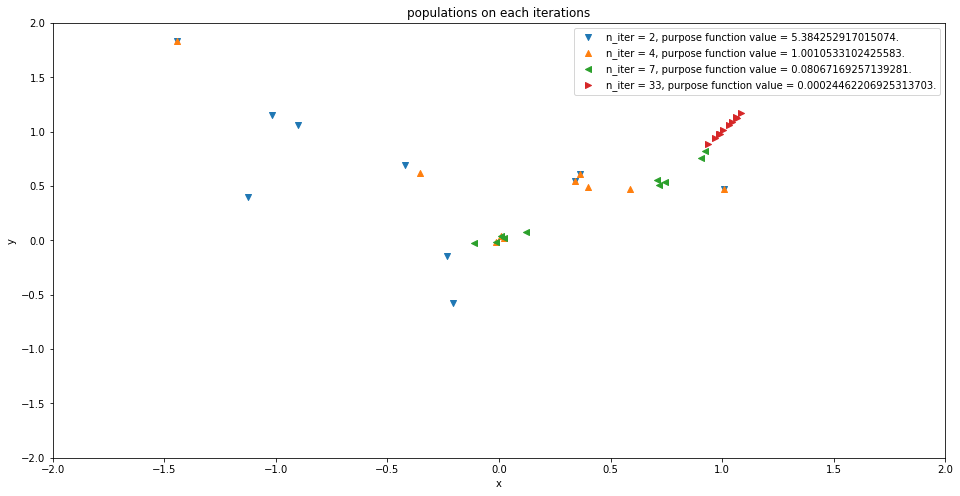

In [62]:
plt.figure(figsize=(16,8))
markerss = ['v', '^', '<', '>']
markers = {indexes[i]:markerss[i] for i in range(len(indexes))}
for index in indexes:
    plt.scatter(plans2[index][:, 0], plans2[index][:, 1], marker=markers[index])
plt.title('populations on each iterations')
plt.ylabel('y')
plt.xlabel('x')
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.legend([
    'n_iter = {}, purpose function value = {}.'.format(index, logs2[index]) for index in indexes])

In [51]:
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
x, y = np.meshgrid(x, y)
fig = plt.figure(figsize=(40, 20))
ax = fig.gca(projection='3d', xlim=[-2, 2], ylim=[-2, 2])
for index in indexes:
    #ax.plot_surface(x, y, np.ones(x.shape) * logs2[index])
    xx = plans2[index][:, 0]
    print(xx)
    yy = plans2[index][:, 1]
    print(yy)
    zz = 100 * (xx ** 2 - yy) ** 2 + (1 - xx) ** 2
    for xxx, yyy, zzz, in zip(xx, yy, zz):
        ax.text(xxx, yyy, zzz, '{}'.format(index), fontsize=50)

ValueError: Unknown projection '3d'

<Figure size 2880x1440 with 0 Axes>

In [30]:
plans2[0]

array([[ 1.94966682, -1.12991634],
       [ 1.67794216,  1.84004998],
       [ 0.95380207, -0.95572526],
       [ 1.77133374,  0.89215049],
       [-1.50117969,  1.49748329],
       [-0.3390871 , -0.54009993],
       [-1.95151462,  1.70576243],
       [ 1.82452259,  1.68729399],
       [-0.2231899 , -1.10687479],
       [-0.44493615, -1.99753511]])